# Image Classification

In [25]:
from sklearn import datasets
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
import numpy as np

In [15]:
# digits = datasets.load_digits()
# X = digits.images
# y = digits.target

4


Load MNIST Dataset
(Documentation: https://www.engati.com/glossary/mnist-dataset)

In [16]:
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy().reshape(-1, 28, 28)
y = y.to_numpy().astype(int)

In [17]:
print("# Data samples:", len(y))
print("Dimension of each image:", X[0].shape)
print("Range of input values:", np.min(X), "-", np.max(X))

# Data samples: 70000
Dimension of each image: (28, 28)
Range of input values: 0.0 - 255.0


View image as a matrix

In [18]:
import pandas as pd
pd.DataFrame(X[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,175.0,26.0,166.0,255.0,247.0,127.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,36.0,...,225.0,172.0,253.0,242.0,195.0,64.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,238.0,253.0,...,93.0,82.0,82.0,56.0,39.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,219.0,253.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalize the image

In [19]:
X = X / 255.

In [20]:
import pandas as pd
pd.DataFrame(X[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,...,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,...,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313725,0.611765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


Visualize a few images

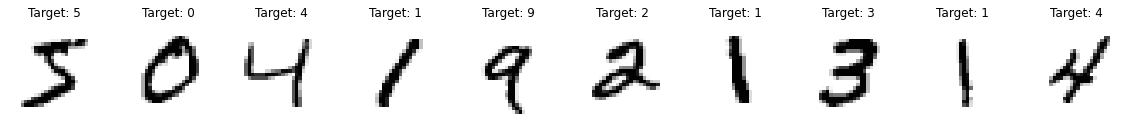

In [26]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Target: %i" % label)

Split the dataset into train, validation and test sets {The train and val size are kept very small for fast training}

In [30]:
from sklearn.model_selection import train_test_split
n_samples = len(y)
data = X.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.9, shuffle=False
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.5, shuffle=False
)

print("# Train samples:", len(y_train))
print("# Val samples:", len(y_val))
print("# Test samples:", len(y_test))

# Train samples: 3500
# Val samples: 3500
# Test samples: 63000


Analyse the data distribution

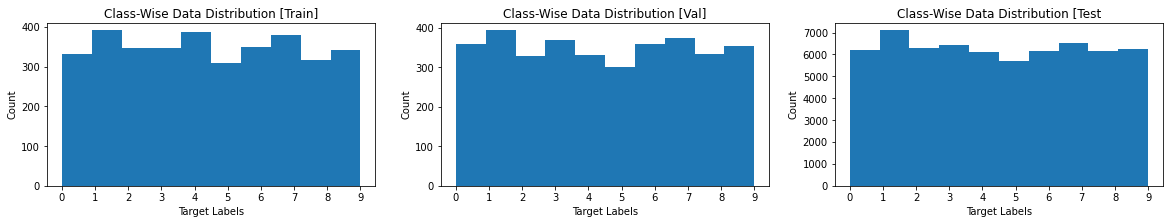

In [31]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 3))

axes[0].hist(y_train)
axes[0].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axes[0].set_title("Class-Wise Data Distribution [Train]")
axes[0].set_xlabel("Target Labels")
axes[0].set_ylabel("Count")

axes[1].hist(y_val)
axes[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axes[1].set_title("Class-Wise Data Distribution [Val]")
axes[1].set_xlabel("Target Labels")
axes[1].set_ylabel("Count")

axes[2].hist(y_test)
axes[2].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axes[2].set_title("Class-Wise Data Distribution [Test")
axes[2].set_xlabel("Target Labels")
axes[2].set_ylabel("Count")
plt.show()

## Let's train a Logistic Regression model (using sklearn)

No regularization

In [32]:
from sklearn.linear_model import LogisticRegression
classifier_no_reg = LogisticRegression(penalty='none', solver='saga', n_jobs=-1).fit(X_train, y_train)

print("No regularization")
print(f"Train Score: {classifier_no_reg.score(X_train, y_train)}")
print(f"Val Score: {classifier_no_reg.score(X_val, y_val)}")

No regularization
Train Score: 0.9965714285714286
Val Score: 0.8945714285714286


c:\Users\khush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


L1 regularization

In [33]:
classifier_l1 = LogisticRegression(penalty='l1', solver='saga', n_jobs=-1).fit(X_train, y_train)

print("L1 Regularization")
print(f"Train Score: {classifier_l1.score(X_train, y_train)}")
print(f"Val Score: {classifier_l1.score(X_val, y_val)}")

L1 Regularization
Train Score: 0.9688571428571429
Val Score: 0.9017142857142857


c:\Users\khush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


L2 regularization

In [34]:
classifier_l2 = LogisticRegression(penalty='l2', solver='saga', n_jobs=-1).fit(X_train, y_train)

print("L2 Regularization")
print(f"Train Score: {classifier_l2.score(X_train, y_train)}")
print(f"Val Score: {classifier_l2.score(X_val, y_val)}")

L2 Regularization
Train Score: 0.99
Val Score: 0.9028571428571428


c:\Users\khush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Both L1 & L2 regularization

In [ ]:
classifier_l1_l2 = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, n_jobs=-1).fit(X_train, y_train)

print("L2 Regularization")
print(f"Train Score: {classifier_l1_l2.score(X_train, y_train)}")
print(f"Val Score: {classifier_l1_l2.score(X_val, y_val)}")

L2 Regularization
Train Score: 0.9962857142857143
Val Score: 0.894


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Analyze the performance of the trained model (best) on the test set

How to get predictions and compute a metric

Shape of y_test_proba: (63000, 10)
Prediction probabilities for 1st test sample: [0.   0.01 0.01 0.4  0.02 0.   0.   0.   0.54 0.02]
Prediction of 1st test sample: 8
Test Accuracy (custom implementation): 0.8807619047619047
Test Accuracy (using sklearn): 0.8807619047619047


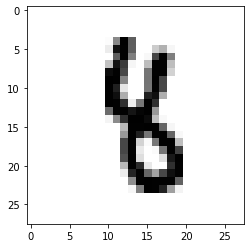

In [35]:
y_test_proba = classifier_no_reg.predict_proba(X_test)
print("Shape of y_test_proba:", y_test_proba.shape)
print("Prediction probabilities for 1st test sample:", np.round(y_test_proba[0], 2))
print("Prediction of 1st test sample:", np.argmax(y_test_proba[0]))
print("Test Accuracy (custom implementation):", sum((np.argmax(y_test_proba, 1) == y_test).astype(int)) / len(y_test))
print("Test Accuracy (using sklearn):", classifier_no_reg.score(X_test, y_test))
plt.imshow(X_test[0].reshape(28, 28), cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

Analyzing the classification probabilities of the misclassifications

0
[0.78265934 0.98474572 0.77164916 ... 0.973534   0.93300078 0.84454049]


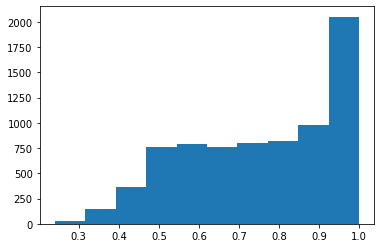

In [46]:
misclassification_idx = np.where((np.argmax(y_test_proba, 1) != y_test))
print(sum(np.argmax(y_test_proba[misclassification_idx], 1) == y_test[misclassification_idx]).astype('int'))
probabilities = np.max(y_test_proba[misclassification_idx], 1)
print(probabilities)
plt.hist(probabilities)
plt.show()

Visualize some non-confident predictions that were misclassified (confidence < 0.5)

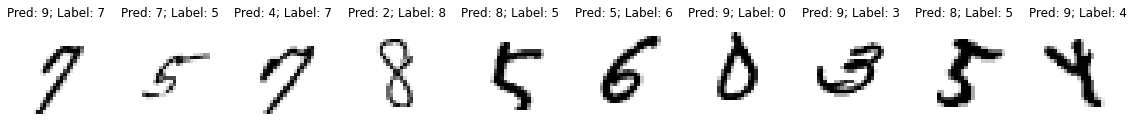

# Non Confident Misclassifications: (780,)


In [47]:
non_confident_misclassifications_idx = np.where(np.max(y_test_proba[misclassification_idx], 1) < 0.5)
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
images = X_test[misclassification_idx[0][non_confident_misclassifications_idx]].reshape(-1, 28, 28)
predictions = np.argmax(y_test_proba[misclassification_idx[0][non_confident_misclassifications_idx]], 1)
labels = y_test[misclassification_idx[0][non_confident_misclassifications_idx]]
for ax, image, pred, label in zip(axes, images, predictions, labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred: {pred}; Label: {label}")
plt.show()
print("# Non Confident Misclassifications:", non_confident_misclassifications_idx[0].shape)

Visualize some very-confident predictions that were misclassified (confidence > 0.9)

(array([   1,    3,    4, ..., 7506, 7509, 7510], dtype=int64),)
(array([    5,     6,     9, ..., 62980, 62982, 62986], dtype=int64),)


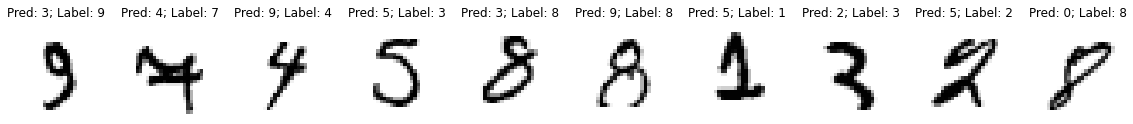

# Confident Misclassifications: (2424,)


In [57]:
confident_misclassifications_idx = np.where(np.max(y_test_proba[misclassification_idx], 1) > 0.9)
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
images = X_test[misclassification_idx[0][confident_misclassifications_idx]].reshape(-1, 28, 28)
predictions = np.argmax(y_test_proba[misclassification_idx[0][confident_misclassifications_idx]], 1)
labels = y_test[misclassification_idx[0][confident_misclassifications_idx]]
for ax, image, pred, label in zip(axes, images, predictions, labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred: {pred}; Label: {label}")
plt.show()
print("# Confident Misclassifications:", confident_misclassifications_idx[0].shape)

Compute some more metrics

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.argmax(y_test_proba, 1))

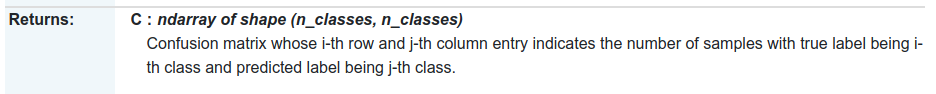

In [60]:
print(cm)

[[5869    0   87   28   12   61   65   32   39   19]
 [   3 6822   31   35    7   36   20   22  100   17]
 [  53   85 5405  136   86   55  121  125  185   64]
 [  37   37  161 5458    7  381   26   91  153   74]
 [  17   16   38   13 5553   19   62   28   54  308]
 [ 116   46   47  278  113 4612  107   65  212  107]
 [  88   22  125    3  116  129 5611   29   27   17]
 [  20   48  122   56   69   14    7 5820   19  364]
 [  56  160  108  233   91  244   87   60 4984  152]
 [  31   32   49  117  256   54    4  290   76 5354]]


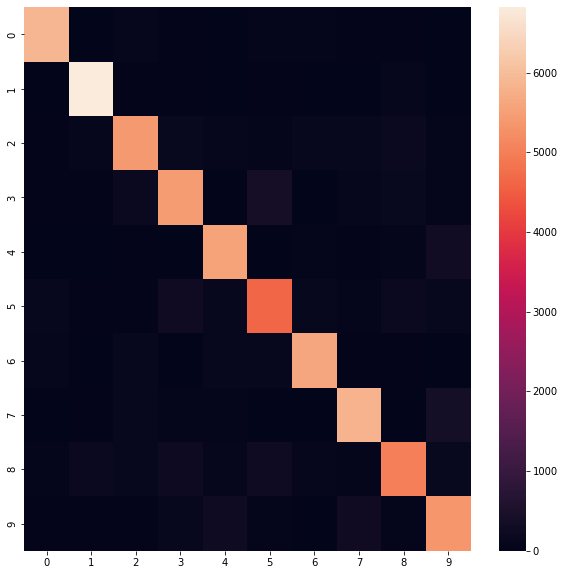

In [61]:
import seaborn as sn
plt.figure(figsize=(10, 10))
sn.heatmap(cm)
plt.show()

Class-wise Accuracy


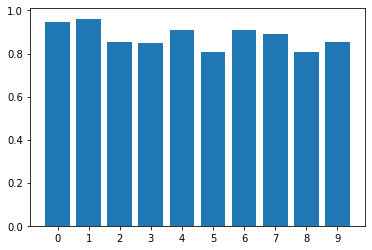

In [62]:
print("Class-wise Accuracy")
plt.bar(np.arange(10), cm.diagonal()/cm.sum(axis=1))
plt.xticks(np.arange(10))
plt.show()

$Precision =\frac{TP}{TP + FP}$ 

$Recall = \frac{TP}{TP + FN}$

$F1-Score = 2 * \frac{Precision \cdot Recall}{Precision + Recall}
         = \frac{TP}{TP + \frac{1}{2}(FP+FN)}$ 

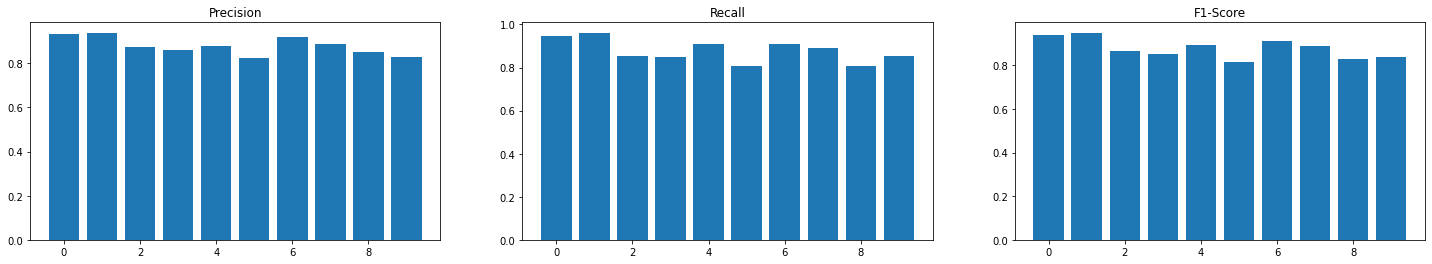

In [64]:
from sklearn.metrics import precision_recall_fscore_support as compute_metric
metric = compute_metric(y_test, np.argmax(y_test_proba, 1))
_, axes = plt.subplots(ncols=3, figsize=(25, 4))
axes[0].bar(np.arange(10), metric[0])
axes[0].set_title("Precision")
axes[1].bar(np.arange(10), metric[1])
axes[1].set_title("Recall")
axes[2].bar(np.arange(10), metric[2])
axes[2].set_title("F1-Score")
plt.show()

Visualizing the features in a 2D space using PCA

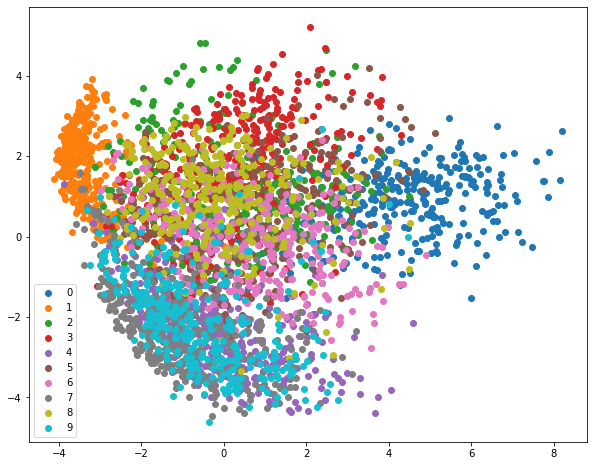

In [69]:
from sklearn.decomposition import PCA
X_embedded = PCA(n_components=2).fit_transform(X_train)

plt.figure(figsize=(10, 8))
for i in range(10):
  idx = np.where(y_train == i)
  plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=i)
plt.legend()
plt.show()

Extracting features using PCA

In [74]:
transformer = PCA(n_components=50)
X_embedded = transformer.fit_transform(X_train)
classifier_no_reg = LogisticRegression(penalty='none', solver='saga', n_jobs=-1).fit(X_embedded, y_train)

print("No regularization")
print(f"Train Score: {classifier_no_reg.score(X_embedded, y_train)}")
print(f"Val Score: {classifier_no_reg.score(transformer.transform(X_val), y_val)}")
print(f"Test Score: {classifier_no_reg.score(transformer.transform(X_test), y_test)}")

c:\Users\khush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


No regularization
Train Score: 0.9334285714285714
Val Score: 0.9025714285714286
Test Score: 0.8821904761904762


## Toy example (Importance of choosing metric wisely?)

Dataset for binary classification.

The dataset is highly imbalanced. It contains 9,000 samples of category 1 and only 1,000 samples of category 0.

In [80]:
dataset = np.ones(9000)
dataset = np.hstack([dataset, np.zeros(1000)])
dataset[:9002]

array([1., 1., 1., ..., 1., 0., 0.])

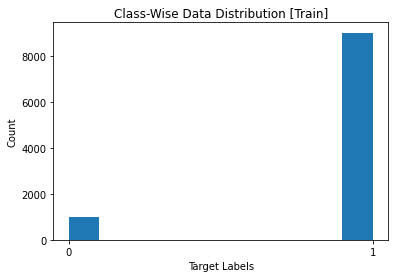

In [81]:
plt.hist(dataset)
plt.xticks([0, 1])
plt.title("Class-Wise Data Distribution [Train]")
plt.xlabel("Target Labels")
plt.ylabel("Count")
plt.show()

Metric without averaging (i.e., average=None) [Predicting everything as '0']

c:\Users\khush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


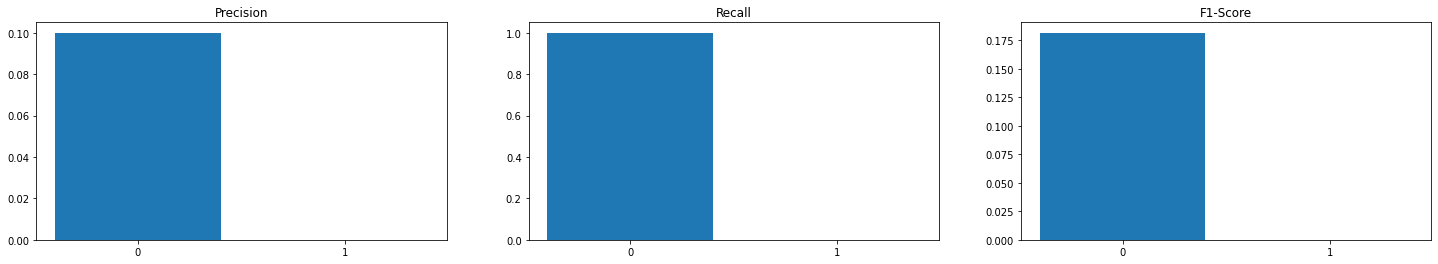

In [85]:
metric = compute_metric(dataset, np.zeros(10000))
_, axes = plt.subplots(ncols=3, figsize=(25, 4))
axes[0].bar(np.arange(2), metric[0])
axes[0].set_title("Precision")
axes[0].set_xticks([0, 1])
axes[1].bar(np.arange(2), metric[1])
axes[1].set_title("Recall")
axes[1].set_xticks([0, 1])
axes[2].bar(np.arange(2), metric[2])
axes[2].set_title("F1-Score")
axes[2].set_xticks([0, 1])
plt.show()

Metric without averaging (i.e., average=None) [Predicting everything as '1']

c:\Users\khush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


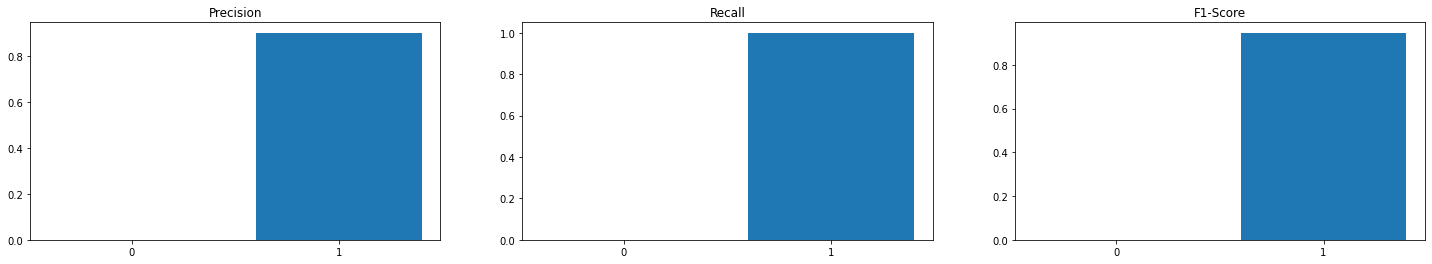

In [86]:
metric = compute_metric(dataset, np.ones(10000))
_, axes = plt.subplots(ncols=3, figsize=(25, 4))
axes[0].bar(np.arange(2), metric[0])
axes[0].set_title("Precision")
axes[0].set_xticks([0,1])
axes[1].bar(np.arange(2), metric[1])
axes[1].set_title("Recall")
axes[1].set_xticks([0,1])
axes[2].bar(np.arange(2), metric[2])
axes[2].set_title("F1-Score")
axes[2].set_xticks([0,1])
plt.show()

Macro Averaging:

In [87]:
metric = compute_metric(dataset, np.ones(10000), average="macro")
print("Precision:", metric[0])
print("Recall:", metric[1])
print("F1-Score:", metric[2])

Precision: 0.45
Recall: 0.5
F1-Score: 0.4736842105263158


c:\Users\khush\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Micro Averaging:

In [88]:
metric = compute_metric(dataset, np.ones(10000), average="micro")
print("Precision:", metric[0])
print("Recall:", metric[1])
print("F1-Score:", metric[2])

Precision: 0.9
Recall: 0.9
F1-Score: 0.9
